In [1]:
! pip install h2o

In [2]:
# ma7tgeen n import el package el 5asa bl automl and inizlie el h2o
import h2o 
from h2o.automl import H2OAutoML


In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.202-b08, mixed mode)
  Starting server from C:\jupyter\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\aboel\AppData\Local\Temp\tmpjsn6bk5_
  JVM stdout: C:\Users\aboel\AppData\Local\Temp\tmpjsn6bk5_\h2o_aboel_started_from_python.out
  JVM stderr: C:\Users\aboel\AppData\Local\Temp\tmpjsn6bk5_\h2o_aboel_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Africa/Cairo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,1 month and 8 days
H2O_cluster_name:,H2O_from_python_aboel_oo6lcr
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.747 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


![](Screenshoth2o.png)

In [4]:
# we will work on breast cancer dataset from sklearn package + lazem n7wl el dataset l H2OFrame 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_breast_cancer
import pandas as pd 
data=load_breast_cancer()
x=data.data
y=data.target 
df=pd.DataFrame(x,columns=data.feature_names)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train_df=pd.DataFrame(x_train,columns=data.feature_names)
y_train_df=pd.DataFrame({'target':y_train})
train_df=pd.concat([x_train_df,y_train_df],axis=1)
x_test_df=pd.DataFrame(x_test,columns=data.feature_names)
y_test_df=pd.DataFrame({'target':y_test})
test_df=pd.concat([x_test_df,y_test_df],axis=1)
# Convert the pandas DataFrame to an H2OFrame
breast_cancer_h2o_train = h2o.H2OFrame(train_df)
breast_cancer_h2o_test = h2o.H2OFrame(test_df)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [5]:
breast_cancer_h2o_train['target']=breast_cancer_h2o_train['target'].asfactor()
breast_cancer_h2o_test['target']=breast_cancer_h2o_test['target'].asfactor()

In [6]:
x=breast_cancer_h2o_train.columns[:-1]
y='target'
model=H2OAutoML(max_runtime_secs=60,seed=13)
model.train(x=x,y=y,training_frame=breast_cancer_h2o_train)

AutoML progress: |
21:30:01.560: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/5
# GBM base models (used / total),1/1
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),1/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
DeepLearning_grid_1_AutoML_1_20241210_213001_model_1,0.998035,0.0554491,0.998828,0.0348837,0.135313,0.0183096,77,0.056114,DeepLearning
DeepLearning_grid_2_AutoML_1_20241210_213001_model_1,0.998035,0.0753147,0.998817,0.0186702,0.15006,0.022518,126,0.05565,DeepLearning
DeepLearning_grid_3_AutoML_1_20241210_213001_model_1,0.997707,0.0591321,0.998583,0.0232558,0.130066,0.0169172,149,0.056325,DeepLearning
GLM_1_AutoML_1_20241210_213001,0.99738,0.0613549,0.998368,0.0232558,0.128811,0.0165922,142,0.0461,GLM
StackedEnsemble_BestOfFamily_4_AutoML_1_20241210_213001,0.997052,0.0712864,0.998202,0.0348837,0.148038,0.0219153,357,0.128204,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20241210_213001,0.996725,0.074843,0.998005,0.0348837,0.151976,0.0230967,369,0.165916,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20241210_213001,0.996725,0.0716718,0.997987,0.0348837,0.145973,0.021308,365,0.110836,StackedEnsemble
DeepLearning_grid_1_AutoML_1_20241210_213001_model_2,0.996397,0.0680784,0.997901,0.0211268,0.149539,0.022362,112,0.05919,DeepLearning
StackedEnsemble_AllModels_1_AutoML_1_20241210_213001,0.996397,0.0780991,0.997829,0.0348837,0.158698,0.0251852,463,0.147735,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20241210_213001,0.996069,0.0696719,0.997508,0.0232558,0.139127,0.0193563,469,0.108478,StackedEnsemble


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_4_AutoML_1_20241210_213001

,0,1,Error,Rate
0,40.0,3.0,0.0698,(3.0/43.0)
1,0.0,71.0,0.0,(0.0/71.0)
Total,40.0,74.0,0.0263,(3.0/114.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

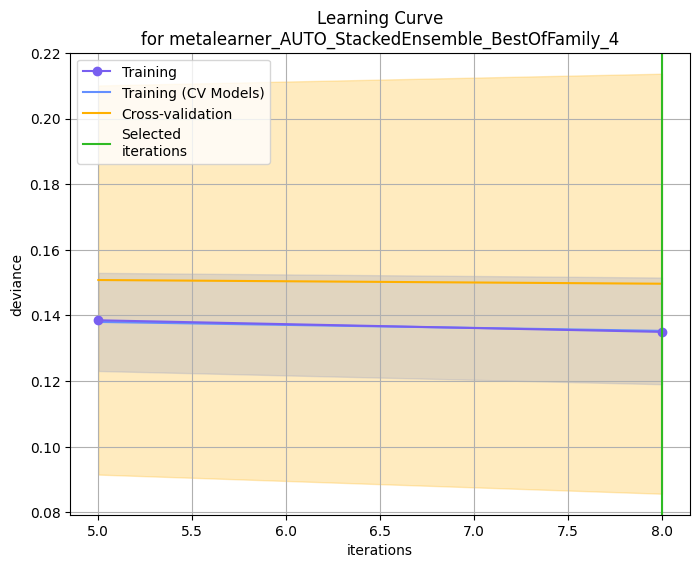

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

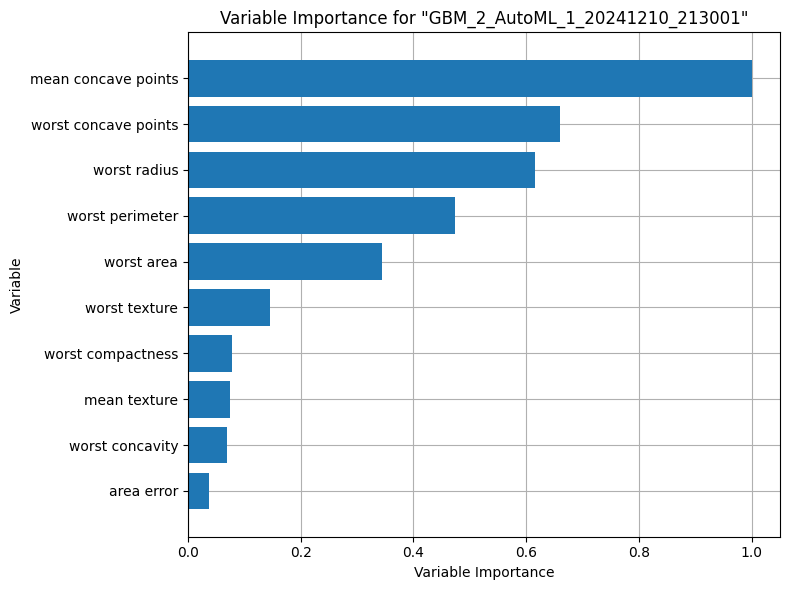

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

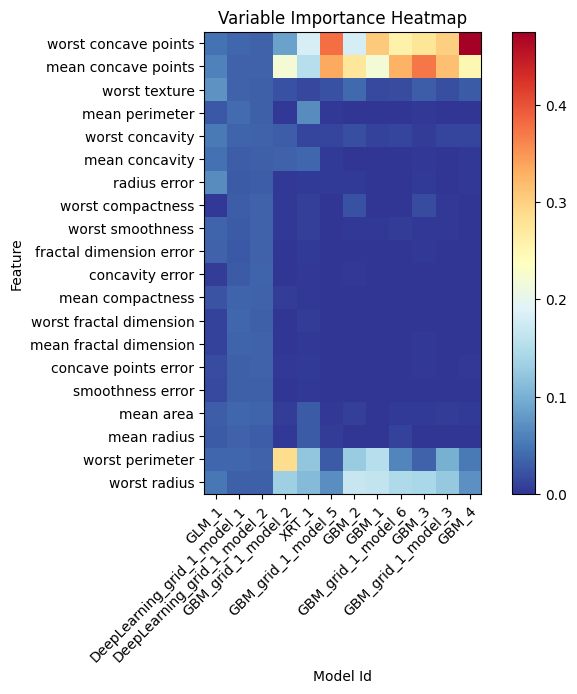

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

In [ ]:
explain_model=model.explain(frame=breast_cancer_h2o_test,figsize=(8,6))

In [ ]:
leaderboard = model.leaderboard
print(leaderboard) # kol el model el adrabt 

In [ ]:
# Display the prediction using test data with the chosen model
predictions = model.leader.predict(breast_cancer_h2o_test)
print(predictions)

In [ ]:
# Display the model performance
performance = model.leader.model_performance(breast_cancer_h2o_test)
print(performance)

In [ ]:
# Confusion matrix visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = breast_cancer_h2o_test['target'].as_data_frame()
y_pred = predictions['predict'].as_data_frame()
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [ ]:
# Stop the H20 cluster
h2o.shutdown()